# PIA - Reinforcement Learning

1. **RL Intro**
2. Dynamic Programing
3. Tabular Q-Learning
4. Deep Reinforcement Learning (DQN)

## 1. RL Intro (30-45 min)

In this first part you will recap some basics from the Reinforcement Learning literature. Namely, you will examine a simple **Markov Decision Process (MDP)** in the form of a gridworld environment, its observations, actions, rewards etc. and how to use them in order to build an intelligent RL agent.

---
### Course of Action

* Please write all executable python code in ```Code```-Cells (```Cell```->```Cell Type```->```Code```) and all Text as [Markdown](http://commonmark.org/help/) in ```Markdown```-Cells
* Describe your thinking and your decisions (where appropriate) in an extra Markdown Cell or via Python comments
* In general: discuss all your results and comment on them (are they good/bad/unexpected, could they be improved, how?, etc.). Furthermore, visualise your data (input and output).
* Write a short general conclusion at the end of the notebook
* Further experiments are encouraged. However, don't forget to comment on your reasoning.
* Use a scientific approach for all experiments (i.e. develop a hypothesis or concrete question, make observations, evaluate results)

### Submission

E-Mail your complete Notebook to [maucher@hdm-stuttgart.de](mailto:maucher@hdm-stuttgart.de) until the start of the next lecture. One Notebook per Group is enough. Edit the teammember table below.

**Important**: Also attach a HTML version of your notebook (```File```->```Download as```->```HTML```) in addition to the ```.ipynb```-File.

| Teammember |                    |
|------------|--------------------|
| 1.         | Geoffrey Hinton    |
| 2.         | Yoshua Bengio      |
| 3.         | Yann LeCun         |
| 4.         | Jürgen Schmidhuber |
---

## Prerequisites

- Install the **[pycolab](https://github.com/deepmind/pycolab)** engine and the **[exitgames](https://gitlab.mi.hdm-stuttgart.de/theodoridis/gridworlds)** gridworlds. The `pip -e` option will simply **link** the folders so python can find them. Just place them somewhere convenient in your system, e.g. next to your notebooks.

```
git clone https://github.com/deepmind/pycolab.git
pip install -e pycolab

git clone https://gitlab.mi.hdm-stuttgart.de/theodoridis/gridworlds.git
pip install -e gridworlds
```

- WINDOWS ONLY: `pycolab` requires the `curses` package which is not available by default. To install a compatible binary, [download the corresponding version from here](https://www.lfd.uci.edu/~gohlke/pythonlibs/#curses). For instance, choose **"curses‑2.2.1+utf8‑cp39‑cp39‑win_amd64.whl"** for python 3.9 on a 64 bit system. Then install with:

```
pip install curses‑2.2.1+utf8‑cp39‑cp39‑win_amd64.whl
```

- For this notebook no further reading is necessary. However, we strongly recommend that you are familiar with the basic concepts of reinforcement learning! Some good resources are:

    1. Johannes Maucher's [lecture on RL](https://gitlab.mi.hdm-stuttgart.de/maucher/ML/tree/master/Slides/V12Reinforcement.pdf) - chapter 1 & 2.
    2. David Silver's course on RL: [Lecture 1](https://www.davidsilver.uk/teaching/), [Youtube](https://www.youtube.com/watch?v=2pWv7GOvuf0).
    3. Sutton & Barto: [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/the-book-2nd.html) chapter 1 & 3 (complete online pdf draft available).

Now, the best way to start is simply to:

### Play the game

> Note: In order to play, you must focus the pygame window! To play again, just restart the cell!

In [26]:
from gridworlds import exitgames

# Goal: Find the exit and avoid the traps
# Actions: Arrow Keys to move, q to quit
# Style Options: "COLOR", "ASCII", "ALL" (will render both)

exitgames.play_notebook(level=0, style="COLOR")

Great! You finished the game in 0:0:14 with a score of 0.


##### Question: 

How large is the **reward** for 
- moving around: <font color=blue><b>0</b></font>
- moving on a trap: <font color=blue><b>-1</b></font>
- getting to the exit: <font color=blue><b>1</b></font>

How large is
- the **state space**  (how many different states are possible): <font color=blue><b>the grid size of the game 4x4 matrix, therefore the possible states that the player can be in is 4*4 = 16</b></font>
- the **action space** (doing "nothing" is considered as NOOP action): <font color=blue><b>The possible moves are {0: 'NORTH', 1: 'SOUTH', 2: 'WEST', 3: 'EAST', 4: 'STAY'}
and therefore the agent has 5 different moves available.</b></font>


### Build a random agent

Now lets get familiar how an **agent** can play the game in an **agent-environment loop**. This is what we will build:

<img src="./RL_pics/AgentEnvLoop.png" alt="Agent-Environment-Loop" style="width: 400px;"/>

Since our first agent will simply pick actions at random (ignoring any inputs), the main task here is to learn about the exitgame interface and how to use it.

> In general, the agent will select actions based on the last state it has received. The Environment will then execute the action and emit the resulting reward and next state. Our ultimate goal is to build an agent that is able to **learn** from these $ ( S_t, A_t, R_{t+1}, S_{t+1})$ tuples. Over time, the agent should then select *better* actions leading to more reward in total.

###### Environment
- First, initialize the environment (the game). 

In [27]:
# create a new game
game = exitgames.make_game(level=0)

# initialize the game, this will return an observation, the first reward and 
# some additional information (_) which you can ignore by now.
observation, reward, _ = game.its_showtime()

###### Observations
- Now, investigate how state is represented.

The **observation** object is holding two things:
1. The full game board, encoded as ASCII code integers: `observation.board`
2. A layer wise representation of all game objects, encoded as boolean maps: `observation.layers`

The **game board** is all we need since it encodes all information at once! However, the boolean maps can be handy in some cases so have a quick look at both!

In [28]:
observation

Observation(board=array([[ 35,  35,  35,  35,  35,  35],
       [ 35,  32,  32,  32,  69,  35],
       [ 35,  32, 120,  32,  32,  35],
       [ 35,  32,  32, 120,  32,  35],
       [ 35,  80,  32,  32,  32,  35],
       [ 35,  35,  35,  35,  35,  35]], dtype=uint8), layers={'E': array([[False, False, False, False, False, False],
       [False, False, False, False,  True, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]]), 'x': array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False,  True, False, False, False],
       [False, False, False,  True, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]]), ' ': array([[False, False, False, False, False, False],
       [False,  True,  True,  True, False, 

In [29]:
observation.board

array([[ 35,  35,  35,  35,  35,  35],
       [ 35,  32,  32,  32,  69,  35],
       [ 35,  32, 120,  32,  32,  35],
       [ 35,  32,  32, 120,  32,  35],
       [ 35,  80,  32,  32,  32,  35],
       [ 35,  35,  35,  35,  35,  35]], dtype=uint8)

In [30]:
observation.board.shape

(6, 6)

In [31]:
observation.layers

{'E': array([[False, False, False, False, False, False],
        [False, False, False, False,  True, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False]]),
 'x': array([[False, False, False, False, False, False],
        [False, False, False, False, False, False],
        [False, False,  True, False, False, False],
        [False, False, False,  True, False, False],
        [False, False, False, False, False, False],
        [False, False, False, False, False, False]]),
 ' ': array([[False, False, False, False, False, False],
        [False,  True,  True,  True, False, False],
        [False,  True, False,  True,  True, False],
        [False,  True,  True, False,  True, False],
        [False, False,  True,  True,  True, False],
        [False, False, False, False, False, False]]),
 'P': array([[False, False, False, False, F

In [32]:
# You can get a more human friendly "rendering" of the board by
# printing the ASCII codes of the board as actual characters. For starters, simply use the notebook_ui utility.
ui = exitgames.get_notebook_ui()

# Style Options: "COLOR", "ASCII", "ALL" (will render both)
ui.render(observation.board, "ASCII")

###### Actions
Great, now that you have seen how state is (and can be) represented, lets see how an agent can play the game by performing actual actions. But before acting in the environment:

- Have a look at the possible actions


1. You can validate your answer from question one by checking `game.action_space`.
2. The method `game.get_action_set()` will return a dictionary with all possible actions.
3. You can print the action meanings with `game.print_action_meanings()`.

In [33]:
game.action_space

5

In [34]:
game.get_action_set()

{0: (-1, 0), 1: (1, 0), 2: (0, -1), 3: (0, 1), 4: (0, 0)}

In [35]:
game.print_action_meanings()

{0: 'NORTH', 1: 'SOUTH', 2: 'WEST', 3: 'EAST', 4: 'STAY'}


##### Task

- Next, perform an action and retrieve a new `observation, reward, _` triplet.
- To do so, use the `game.play()` method which takes an **action key** integer (0,1,2,3,4) as argument and returns the next triplet.

- Play one (or more) actions, print the reward and render the resulting observation.
- If your output is not showing correctly, make sure to put the "render" call last as it will trigger the notebook cell to repaint.
- If you reached the exit, read the next notebook cell.

<font color=blue><b>Comment:</b></font> We created an array of moves to deliberately move over every type of cell. We can see that when moving over blank cells there is no reward. Moving over an "X" cell will result in a negative reward (Move 2) and moving to the finish cell will give a positive reward.

In [36]:
moves = [3, 3, 0, 3, 0, 0]

for i ,move in enumerate(moves):
    observation, reward, _ = game.play(move)
    print(f"Move {i} reward: {reward}")

ui.render(observation.board, "COLOR")

Move 0 reward: None
Move 1 reward: None
Move 2 reward: -1
Move 3 reward: None
Move 4 reward: None
Move 5 reward: 1


Great, we are almost there. Before you start implementing the full agent-evironment loop and a basic random agent, here is some additional but important stuff to consider:

###### Episodes
- Exitgames are played in **episodes**, formally they are episodic MDPs. 
- If you reach a **terminal state** (the exit), the **episode** is over and calling `play()` will crash. If you want, try it if it didnt happened already. 
- You can *reset* the game to play a new episode simply by creating a new game with `exitgames.make_game()`. You can detect when the game is over by checking `game.game_over`.

###### Return
- In Reinforcement Learning, the canonical goal of the agent is to collect **as much reward as possible per episode**. This is called **cumulative reward** or just **return**. To see how good or bad your agent performs per episode, make sure you summarize all rewards per episode and report the total return at the end of each episode.


- You may noticed that the reward is `None` and not `0` if there was emitted "no reward" by the environment. Nothing special about this, just include a type check before you add a reward to your return. This is a pycolab (the engine behind exitgames) specific implementation detail. If you wonder, I just wanted to save you guys some minutes and confusion by pointing this out. Now that I've written such a long text, I wonder how much time this will actually save lol :D .


### Now really, build a random agent

Here is a short checklist :)

##### Initial setup
1. Create a new game
2. Create a placeholder for the return
2. Initialize the game and receive the first triplet, e.g: `observation, reward, _` 
3. Add the first reward to the return

##### Now loop `while not game.game_over:`
1. Select a random action e.g. with `numpy.random` and `game.action_space`
2. Apply the action and receive the next `observation, reward, _` triplet.
3. Add the reward to the return
4. After the episode has terminated, print the total return.

##### Rendering
If you want to see your agent play, just include a render call in the loop. To actually see something, call `time.sleep(0.05)` right after the render call, otherwise the loop will run waaay to fast.

In [39]:
import numpy as np

def random_agent(level):

    # Initial setup
    game = exitgames.make_game(level=level)
    observation, reward, _ = game.its_showtime()
    total_reward = 0
    total_reward += reward if isinstance(reward, int) else 0

    # Loop while the game is not over
    while not game.game_over:
        # 1. Select a random action, -1 because after every action, there is one action less
        action = np.random.choice(game.action_space -1)

        # 2. Apply the action and receive the next observation, reward, _ triplet
        observation, reward, _ = game.play(action)

        # 3. Add the reward to the return
        total_reward += reward if isinstance(reward, int) else 0

    # 4. Print the current level, the number of steps taken and the total reward
    print(f"Level {level} | Steps taken: {game.the_plot.frame} | Total Reward: {total_reward}")

    return game.the_plot.frame, total_reward


In [43]:
random_agent(0)
random_agent(1)
random_agent(2)

Level 0 | Steps taken: 14 | Total Reward: 0
Level 1 | Steps taken: 935 | Total Reward: -214
Level 2 | Steps taken: 38055 | Total Reward: -7890


(38055, -7890)

##### Play more than one Episode
**After** you implemented the basic agent-env loop, surround your solution with another loop and run the whole thing for something like `num_episodes = 30`. You may want to comment out the render and sleep calls again to speed things up.

In [44]:
def random_agent_episodes(level = 0, num_episodes = 0):
    episode_length = []
    episode_returns = []
    
    for episode in range(num_episodes):
        print(f"Episode {episode+1} | ", end="")
        total_steps, total_reward = random_agent(level=level)
        episode_length.append(total_steps)
        episode_returns.append(total_reward)

    return episode_length, episode_returns, num_episodes
     

In [45]:
episode_length, episode_returns, num_episodes = random_agent_episodes(0, 30)

Episode 1 | Level 0 | Steps taken: 49 | Total Reward: -7
Episode 2 | Level 0 | Steps taken: 40 | Total Reward: -8
Episode 3 | Level 0 | Steps taken: 31 | Total Reward: -3
Episode 4 | Level 0 | Steps taken: 15 | Total Reward: -2
Episode 5 | Level 0 | Steps taken: 34 | Total Reward: -2
Episode 6 | Level 0 | Steps taken: 41 | Total Reward: -2
Episode 7 | Level 0 | Steps taken: 32 | Total Reward: -3
Episode 8 | Level 0 | Steps taken: 43 | Total Reward: -8
Episode 9 | Level 0 | Steps taken: 94 | Total Reward: -15
Episode 10 | Level 0 | Steps taken: 48 | Total Reward: -4
Episode 11 | Level 0 | Steps taken: 53 | Total Reward: -1
Episode 12 | Level 0 | Steps taken: 44 | Total Reward: -7
Episode 13 | Level 0 | Steps taken: 48 | Total Reward: -7
Episode 14 | Level 0 | Steps taken: 25 | Total Reward: -3
Episode 15 | Level 0 | Steps taken: 15 | Total Reward: 0
Episode 16 | Level 0 | Steps taken: 113 | Total Reward: -11
Episode 17 | Level 0 | Steps taken: 71 | Total Reward: -6
Episode 18 | Level 0 

## Why a random agent?

Good question, simple answer. Even though it is the most naive agent you can think of, a random agent will provide you with a very first baseline performance. This will help you with a *trivial* but important insight later:

- It tells you if your **learning** agent is learning anything at all, i.e. performs better than random.

Besides, it is easy to implement which helps when setting up new environments. You can for instance, verify that your agent-env loop works as expected by watching some episodes. Since it is easy for humans to recognize *purely* random behavior you can easily detect if something went wrong, at least in *visual* environments. This may seem overly obvious to you but as you proceed to more complex algorithms, it is crucial to know that your basics are working correctly.

### (Optionally) plot some basic statistics

If you want, plot some basic statistics. You can use the code from the cell below to do so. To make the plotting work out of the box, you need to include the following parts in your loop code:

- The variable for the number of episodes must be called `num_episodes`.
- Two placeholder lists `[]` called `episode_returns` and `episode_length`.
- Keep track of the return and the episode lenght by adding them after an episode has terminated.
- Use `game.the_plot.frame` to get the length of an episode.

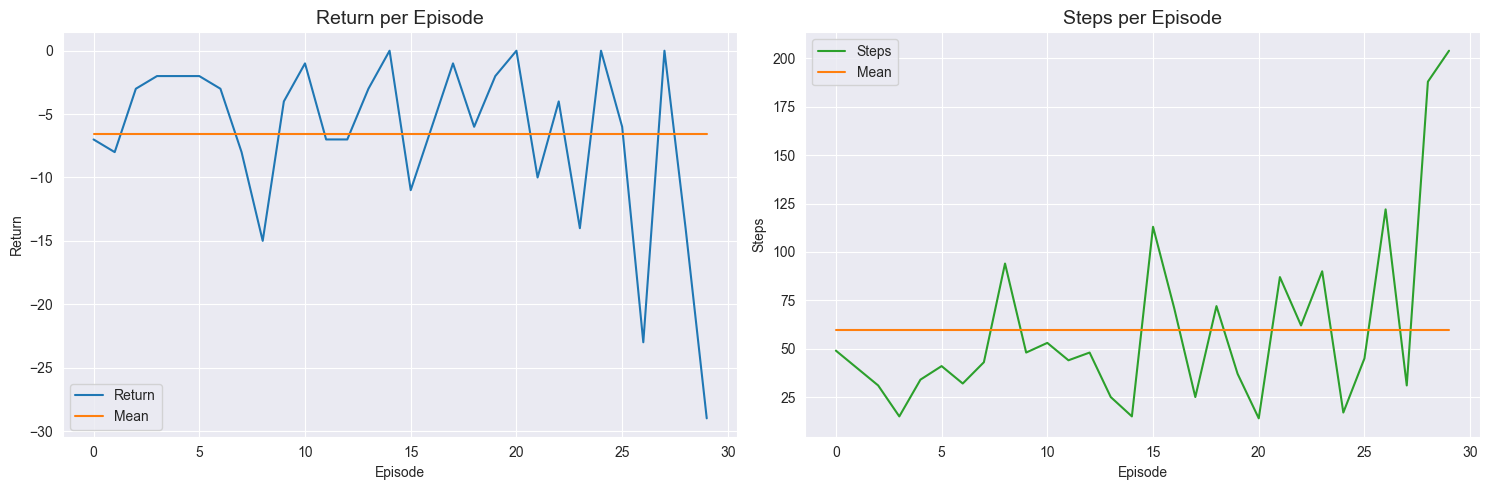

: 

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

sns.set_style("darkgrid")
pallete = sns.color_palette()

mean_return = [np.mean(episode_returns) for i in range(num_episodes)]
mean_length = [np.mean(episode_length)  for i in range(num_episodes)]

fig = plt.figure(figsize=(15,5))

# Plot return per episode  
ax1 = fig.add_subplot(1,2,1)
ax1.plot(episode_returns, color=pallete[0])
ax1.plot(mean_return,     color=pallete[1])
ax1.legend(['Return','Mean'])
ax1.set_title("Return per Episode", fontsize=14)
plt.ylabel("Return")
plt.xlabel("Episode")

# Plot steps per episode
ax2 = fig.add_subplot(1,2,2)
ax2.plot(episode_length, color=pallete[2])
ax2.plot(mean_length,    color=pallete[1])
ax2.legend(['Steps','Mean'])
ax2.set_title("Steps per Episode", fontsize=14)
plt.ylabel("Steps")
plt.xlabel("Episode")

# Show the plot
plt.tight_layout()
plt.show()

## Further Ideas

None, just start with the next notebook! :)

## Next: PIA - Reinforcement Learning: 2. Dynamic Programming